<a href="https://colab.research.google.com/github/GabrielMourad/PlayerWorth-vs-PlayerSalary-COMP541/blob/main/NBA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NBA ANALYSIS - COMP541
######Note that some graphs will need to be seen on Collab :)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
player_salary_df = pd.read_csv("salaries_1985to2018.csv")
overall_player_df = pd.read_csv("players.csv")

In [ ]:
df = pd.merge(overall_player_df, player_salary_df, left_on='_id', right_on='player_id')

In [ ]:
df.dtypes

index_x           int64
_id              object
birthDate        object
birthPlace       object
career_AST      float64
career_FG%       object
career_FG3%      object
career_FT%       object
career_G          int64
career_PER       object
career_PTS      float64
career_TRB       object
career_WS        object
career_eFG%      object
college          object
draft_pick       object
draft_round      object
draft_team       object
draft_year       object
height           object
highSchool       object
name             object
position         object
shoots           object
weight           object
index_y           int64
league           object
player_id        object
salary            int64
season           object
season_end        int64
season_start      int64
team             object
dtype: object

#####Data Preprocessing

In [ ]:
df.drop_duplicates(subset=["name"], keep='last', inplace=True)

In [ ]:
df[df['name'] == "LeBron James"]

,index_x,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,...,shoots,weight,index_y,league,player_id,salary,season,season_end,season_start,team
6315,2019,jamesle01,"December 30, 1984","Akron, Ohio",7.2,50.4,34.3,73.6,1198,27.6,...,Right,250lb,6315,NBA,jamesle01,33285709,2017-18,2018,2017,Cleveland Cavaliers


In [ ]:
irrelevant_cols = ['birthDate', 'birthPlace', 'weight', 'draft_team', 
                   'draft_year', 'draft_round', 'highSchool', 'college', '_id', 'league', 'player_id', 'draft_pick', 
                   'height', 'season_start', 'team', 'season']
df = df.drop(irrelevant_cols, axis = 1)

In [ ]:
df = df.dropna()
df.dtypes

index_x          int64
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
name            object
position        object
shoots          object
index_y          int64
salary           int64
season_end       int64
dtype: object

In [ ]:
df

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end
4,0,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Alaa Abdelnaby,Power Forward,Right,4,650000,1995
8,2,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,Kareem Abdul-Jabbar,Center,Right,8,3000000,1989
17,3,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Mahmoud Abdul-Rauf,Point Guard,Right,17,798500,2001
27,4,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,Tariq Abdul-Wahad,Shooting Guard,Right,27,1968750,2007
38,5,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,38,6600000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,4676,0.2,40.8,25.0,78.3,135,8.7,3.4,2.1,0.8,40.9,George Zidek,Center,Right,14156,784200,1998
14157,4678,0.2,32.3,-,60.0,19,7.3,1.2,1.8,0.0,32.3,Stephen Zimmerman,Center,Left,14157,950000,2017
14159,4679,0.8,37.1,33.5,76.9,98,6.1,4.7,2.6,0.0,44.8,Paul Zipser,Small Forward,Right,14159,1312611,2018
14160,4680,0.6,58.3,-,70.8,91,17.5,6.4,4.2,3.0,58.3,Ante Zizic,Center,Right,14160,1645200,2018


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
avoid_change = ["name",  'position',	'shoots', 'season_end']
for i, col in enumerate(df):
  
  if (df.dtypes[i] == 'object' or df.dtypes[i] == 'float64') and col not in avoid_change:

    df.loc[:, col] = label_encoder.fit_transform(df[col])

<ipython-input-11-5f5f4a3a7743>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = label_encoder.fit_transform(df[col])
<ipython-input-11-5f5f4a3a7743>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = label_encoder.fit_transform(df[col])
<ipython-input-11-5f5f4a3a7743>:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uniq

In [ ]:
df.dtypes

index_x         int64
career_AST      int64
career_FG%      int64
career_FG3%     int64
career_FT%      int64
career_G        int64
career_PER      int64
career_PTS      int64
career_TRB      int64
career_WS       int64
career_eFG%     int64
name           object
position       object
shoots         object
index_y         int64
salary          int64
season_end      int64
dtype: object

#####Calculating Value & ROI

In [ ]:
df['value'] = (df['career_AST'] * 2 + df['career_PTS'] * 2 + df['career_TRB'] + df['career_WS'] * 5) * 1000

In [ ]:
df['roi'] = df['value'] / df['salary']

In [ ]:
df['roi']
df

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end,value,roi
4,0,3,238,1,232,256,89,57,51,378,215,Alaa Abdelnaby,Power Forward,Right,4,650000,1995,2061000,3.170769
8,2,36,295,309,252,1560,202,221,29,272,272,Kareem Abdul-Jabbar,Center,Right,8,3000000,1989,1903000,0.634333
17,3,35,177,221,426,586,113,146,19,247,184,Mahmoud Abdul-Rauf,Point Guard,Right,17,798500,2001,1616000,2.023795
27,4,11,152,104,234,236,73,78,51,296,134,Tariq Abdul-Wahad,Shooting Guard,Right,27,1968750,2007,1709000,0.868063
38,5,25,207,160,341,830,149,180,93,571,191,Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,38,6600000,2010,3358000,0.508788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,4676,2,143,114,314,135,272,34,39,26,121,George Zidek,Center,Right,14156,784200,1998,241000,0.307320
14157,4678,2,62,0,137,19,257,12,18,18,47,Stephen Zimmerman,Center,Left,14157,950000,2017,136000,0.143158
14159,4679,8,106,202,300,98,245,47,44,18,160,Paul Zipser,Small Forward,Right,14159,1312611,2018,244000,0.185889
14160,4680,6,313,0,239,91,134,64,60,291,292,Ante Zizic,Center,Right,14160,1645200,2018,1655000,1.005957


In [ ]:
df = df.sort_values('roi', ascending = False)

In [ ]:
df.head(10)

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end,value,roi
10688,3480,65,179,196,183,639,108,111,46,261,182,Pooh Richardson,Point Guard,Right,10688,5882,2000,1703000,289.527372
7374,2421,60,195,226,301,551,131,127,45,392,217,Ty Lawson,Point Guard,Right,7374,8313,2018,2379000,286.178275
3101,956,13,177,111,186,230,78,55,48,192,167,Mark Davis,Small Forward,Right,3101,6000,2000,1144000,190.666667
9029,2972,10,189,153,210,191,78,55,67,601,176,Tod Murphy,Center and Power Forward,Right,9029,20000,1994,3202000,160.100000
6728,2140,8,174,196,282,624,281,54,17,650,171,Dahntay Jones,Small Forward and Shooting Guard,Right,6728,24022,2017,3391000,141.162268
5619,1817,16,200,209,339,779,94,90,54,352,210,Rod Higgins,Power Forward and Small Forward,Right,5619,15800,1995,2026000,128.227848
9956,3261,10,266,1,132,782,66,54,76,271,243,Kendrick Perkins,Center,Right,9956,13156,2018,1559000,118.501064
10579,3446,32,151,230,275,277,90,78,39,605,194,Khalid Reeves,Point Guard,Right,10579,30309,2000,3284000,108.350655
8219,2683,24,143,202,242,154,69,60,38,190,159,Ray McCallum,Point Guard,Right,8219,11949,2017,1156000,96.744497
14063,4632,15,159,232,337,549,103,84,56,254,216,Dorell Wright,Small Forward,Right,14063,17637,2016,1524000,86.409253


In [ ]:
df.tail(10)

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end,value,roi
10168,3316,5,278,0,85,346,96,49,63,43,255,Miles Plumlee,Center,Right,10168,12500000,2018,386000,0.030880
4518,1435,2,2,1,2,9,19,4,3,0,2,Michael Gbinije,Shooting Guard,Right,4518,500000,2018,15000,0.030000
10772,3510,3,1,1,0,3,14,0,3,0,1,Terrance Roberson,Small Forward,Right,10772,316969,2001,9000,0.028394
2888,899,66,212,297,426,694,196,216,63,53,291,Stephen Curry,Point Guard,Right,2888,34682550,2018,892000,0.025719
12637,4186,0,12,0,24,22,26,7,7,4,12,Cezary Trybanski,Center,Right,12637,1700000,2005,41000,0.024118
3446,1089,3,102,83,137,16,267,18,5,0,129,Zoran Dragic,Shooting Guard,Left,3446,2050397,2016,47000,0.022922
7184,2329,4,32,114,158,34,240,11,5,0,41,Yaroslav Korolev,Small Forward,Right,7184,1832280,2007,35000,0.019102
6077,1951,0,1,0,0,5,34,0,2,1,1,Mile Ilic,Center,Right,6077,864000,2008,7000,0.008102
7243,2364,0,1,0,0,5,12,0,2,0,1,Ibo Kutluay,Shooting Guard,Right,7243,1760000,2006,2000,0.001136
8284,2710,0,1,0,0,5,24,0,0,0,1,Chris McCray,Shooting Guard,Right,8284,161061,2007,0,0.000000


#####Handling Outliers

Text(0, 0.5, 'Value')

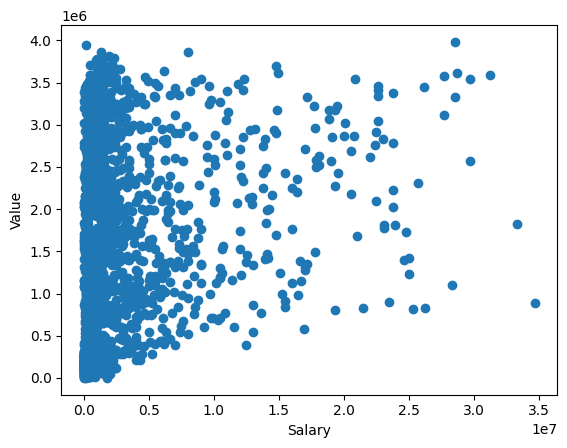

In [ ]:
plt.scatter(df['salary'], df['value'])

# label the axes
plt.xlabel('Salary')
plt.ylabel('Value')

In [ ]:
df = df[(df['salary'] > 50000) & (df['season_end'] > 2000)] 

<Axes: title={'center': 'Salary vs Value'}, xlabel='salary', ylabel='value'>

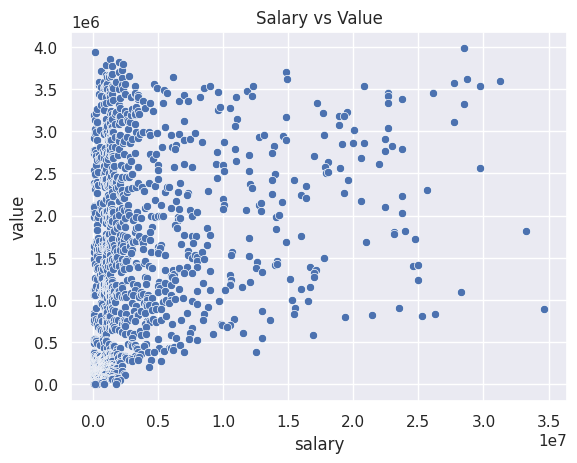

In [51]:
sns.set()
plt.title("Salary vs Value")
graph = sns.scatterplot(x = 'salary', y = 'value', data = df)
graph

<Axes: title={'center': 'Salary vs ROI'}, xlabel='roi', ylabel='salary'>

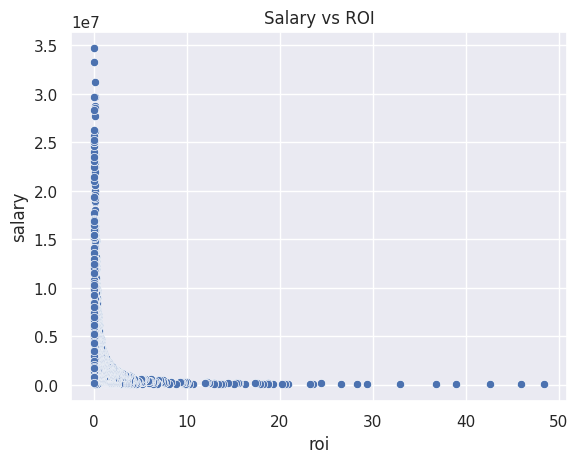

In [52]:
plt.title("Salary vs ROI")
graph = sns.scatterplot(x = 'roi', y = 'salary', data = df)
graph

In [ ]:
df[df['salary'] < 100000]

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end,value,roi
12101,3997,4,223,91,199,281,104,46,45,556,201,Mark Strickland,Power Forward and Small Forward,Right,12101,60361,2003,2925000,48.458442
5379,1723,23,152,182,319,341,81,48,17,607,151,Jason Hart,Point Guard,Right,5379,69518,2010,3194000,45.944935
3332,1049,3,245,311,317,225,115,60,49,511,223,Ike Diogu,Power Forward,Right,3332,64028,2012,2730000,42.637596
2085,635,19,106,218,367,235,66,81,19,373,193,Isaiah Canaan,Shooting Guard and Point Guard,Right,2085,53465,2018,2084000,38.978771
4691,1489,28,142,253,323,266,86,63,13,510,191,Anthony Goldwire,Point Guard,Right,4691,74652,2006,2745000,36.770616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,804,10,5,1,3,16,27,4,7,3,5,Will Conroy,Shooting Guard and Point Guard,Right,2616,85439,2013,50000,0.585213
9024,2970,1,19,69,0,17,32,9,2,2,22,Kevin Murphy,Shooting Guard,Right,9024,65000,2015,32000,0.492308
3136,973,3,8,43,0,4,35,8,5,0,20,Andre Dawkins,Shooting Guard,Right,3136,59686,2015,27000,0.452367
9274,3048,1,30,69,60,18,52,12,4,1,51,Demetris Nichols,Small Forward,Right,9274,87893,2009,35000,0.398211


#####Plotting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df[df['name'] == "Russell Westbrook"]

,index_x,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,name,position,shoots,index_y,salary,season_end,value,roi
13380,4420,79,169,175,332,821,195,215,88,661,177,Russell Westbrook,Point Guard,Right,13380,28530608,2018,3981000,0.139534


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="salary", y="value", hover_data=["name"])
fig.show()

In [ ]:
fig = px.scatter(df, x="roi", y="salary", hover_data=["name"])
fig.show()

######Model Building (Linear Regression)

In [ ]:
#career_AST	career_FG%	career_FG3%	career_FT%	career_G	career_PER	career_PTS	career_TRB	career_WS	career_eFG%
X = df[['career_AST', 'career_PTS', 'career_TRB', 'career_WS', 'career_G',  'career_eFG%', 'career_FG%', 'career_FT%', 'career_FG3%' , 'career_PER']]
y = df['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", format(mse, ".2e"))

# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", format(mae, ".2e"))

MSE: 1.63e-18
MAE: 1.01e-09


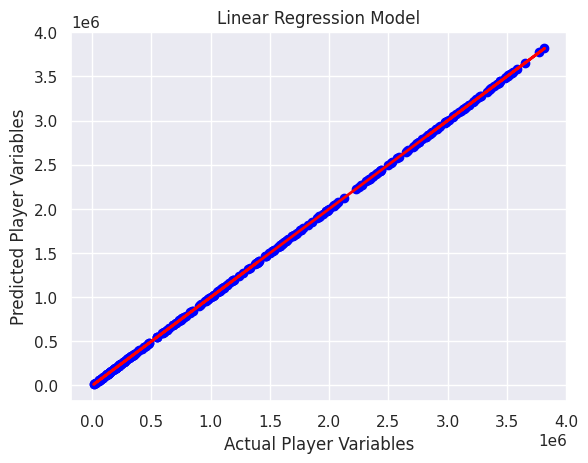

In [53]:
plt.title("Linear Regression Model")
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual Player Variables')
plt.ylabel('Predicted Player Variables')
plt.show()